<a href="https://colab.research.google.com/github/Vincent112704/NLP_vectorizing/blob/main/Vectorizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [ ]:
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
df = pd.read_csv('/evaluation.csv', delimiter=';')

In [ ]:
df.head()

,Unnamed: 0,title,text,label
0,0,"Sanders back in U.S. Senate, blasts 'coloniali...",WASHINGTON (Reuters) - Democratic U.S. preside...,1
1,1,Kremlin: Syria peoples' congress being 'active...,MOSCOW (Reuters) - A proposal to convene a con...,1
2,2,Oregon Cop Convicted Of Shattering Biker’s Co...,"In a baffling fit of rage, an Oregon State Pol...",0
3,3,Twitter Erupts With Glee Over #CruzSexScandal...,The last thing any politician running for the ...,0
4,4,MUST WATCH VIDEO: Obama Tries To Trash Trump B...,This is too good to miss! Mr. Teleprompter did...,0


Check if the labels are evenly represented because it becomes an issue when checking model's performance (i.e if data is 99% label x, then 99% accuracy will be get by only predicting that label

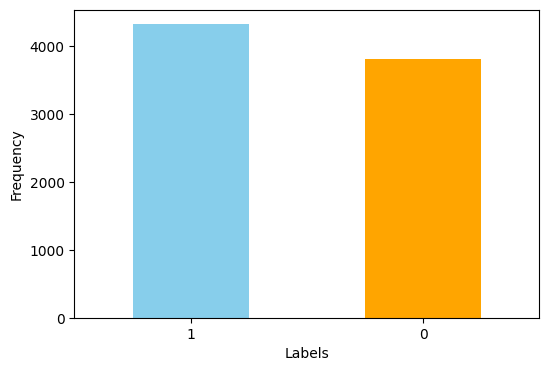

In [ ]:
input=df['text']
output=df['label']


output.value_counts().plot(kind='bar', color=['skyblue', 'orange'], figsize=(6, 4))
plt.ylabel('Frequency')
plt.xlabel('Labels')
plt.xticks(rotation=0)
plt.show()

In [ ]:
input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.2, random_state=42)

In [ ]:
vectorizer = CountVectorizer()

Xtrain = vectorizer.fit_transform(input_train)
Xtest = vectorizer.transform(input_test)

Xtrain

<6493x55094 sparse matrix of type '<class 'numpy.int64'>'
	with 1343081 stored elements in Compressed Sparse Row format>

Compute the percentage of non-zero elements

In [ ]:
non_zeroElements = (Xtrain != 0).sum()
total = np.prod(Xtrain.shape)
percentage = (non_zeroElements / total) * 100
print(f"Percentage of non-zero elements: {percentage:.2f}%")

Percentage of non-zero elements: 0.38%


Model without stopwords

In [ ]:
model = MultinomialNB()
model.fit(Xtrain, output_train)
print(f"Model train score: {model.score(Xtrain, output_train)}")
print(f"Model test score: {model.score(Xtest, output_test)}")

Model train score: 0.9544124441706453
Model test score: 0.9341133004926109


With stopwords

In [ ]:
vectorizer2 = CountVectorizer(stop_words='english')
Xtrain2 = vectorizer2.fit_transform(input_train)
Xtest2 = vectorizer2.transform(input_test)
model2 = MultinomialNB()
model2.fit(Xtrain2, output_train)
print(f"Model train score: {model2.score(Xtrain2, output_train)}")
print(f"Model test score: {model2.score(Xtest2, output_test)}")

Model train score: 0.9557985522870784
Model test score: 0.9316502463054187


Using lemmatization this time

In [ ]:
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [ ]:
class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self, doc):
    tokens = word_tokenize(doc) #basically splits the strings into word
    words_and_tags = nltk.pos_tag(tokens) #Gets the part of speech returns a tupple with the word and it's pos tag
    return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag))
            for word, tag in words_and_tags] #combines the lematize document

In [ ]:
vectorizer3 = CountVectorizer(tokenizer=LemmaTokenizer())
Xtrain3 = vectorizer3.fit_transform(input_train)
Xtest3 = vectorizer3.transform(input_test)
model3 = MultinomialNB()
model3.fit(Xtrain3, output_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


MultinomialNB()

Score got better with lemmatization!!

In [ ]:
print(f"Model train score: {model3.score(Xtrain3, output_train)}")
print(f"Model test score: {model3.score(Xtest3, output_test)}")

Model train score: 0.9681195133220392
Model test score: 0.9593596059113301


With stemmatization

In [ ]:
class StemTokenizer:
  def __init__(self):
    self.porter = PorterStemmer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    return [self.porter.stem(t) for t in tokens]

In [ ]:
vectorizer4 = CountVectorizer(tokenizer=StemTokenizer())
Xtrain4 = vectorizer4.fit_transform(input_train)
Xtest4 = vectorizer4.transform(input_test)
model = MultinomialNB()
model.fit(Xtrain4, output_train)
print(f"Model train score: {model.score(Xtrain4, output_train)}")
print(f"Model test score: {model.score(Xtest4, output_test)}")

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Model train score: 0.9675034652702911
Model test score: 0.9593596059113301


Using a simple string split

In [ ]:
def simple_tokenizer(doc):
  return doc.split()

In [ ]:
vectorizer5 = CountVectorizer(tokenizer=simple_tokenizer)
Xtrain5 = vectorizer5.fit_transform(input_train)
Xtest5 = vectorizer5.transform(input_test)
model = MultinomialNB()
model.fit(Xtrain5, output_train)
print(f"Model train score: {model.score(Xtrain5, output_train)}")
print(f"Model test score: {model.score(Xtest5, output_test)}")

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Model train score: 0.9739719698136454
Model test score: 0.958743842364532


A simple string split performs better than other techniques of tokenizing